In [1]:
import networkx as nx

G = nx.complete_graph(5)

G.edges



EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)])

In [9]:
from itertools import combinations

def create_complete_graph(n):
    G = nx.Graph()
    G.add_nodes_from(range(n))
    #G.add_edges_from(combinations(G.nodes, 2))
    for i, j in combinations(G.nodes, 2):
        G.add_edge(i, j)
    return G
    
G2 = create_complete_graph(5)
G2.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)])

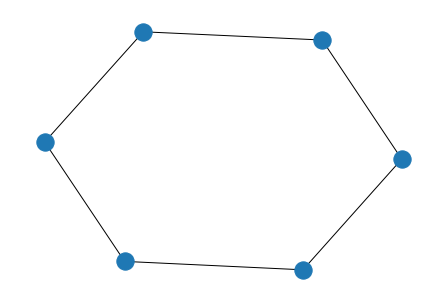

In [15]:
def create_closed_cycle(n):
    G = nx.Graph()
    G.add_nodes_from(range(n))
    a = [(i, (i+1)%n) for i in(G.nodes)]
    G.add_edges_from(a)
    return G
    
G = create_closed_cycle(6)
G.edges()
nx.draw(G)

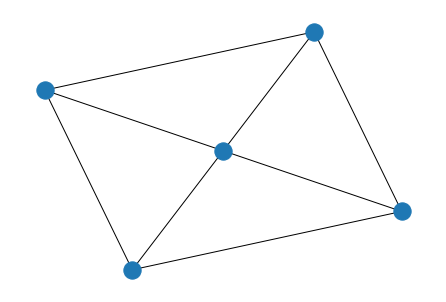

In [66]:
def create_wheel(n):
    G = nx.Graph()
    G.add_nodes_from(range(n))
    a = [(i, (i+1)%(n-1)) for i in range(n-1)]
    G.add_edges_from(a)
    G.add_edges_from([(a,n-1) for a in range(n-1)])
    return G
    
G = create_wheel(5)
G.edges()
nx.draw_kamada_kawai(G)

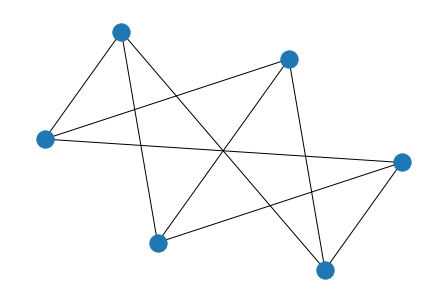

In [38]:
from itertools import product

def create_bypartite(n, m):
    G = nx.Graph()
    G.add_nodes_from(range(n+m))
    G.add_edges_from(product(range(n), range(n, m+n)))
    return G
    
G = create_bypartite(3, 3)
G.edges()
nx.draw_kamada_kawai(G)

  0%|          | 0/10000 [00:00<?, ?it/s]

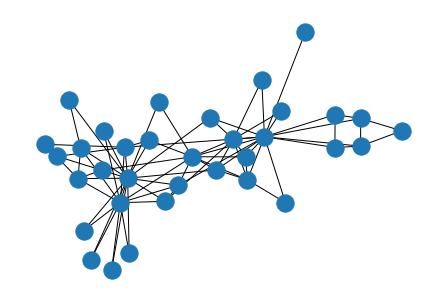

In [65]:
G = nx.read_gml('karate.gml', label = None)

import numpy as np
from random import seed, random
from tqdm.notebook import tqdm

pos = {}
seed(2022)

for i, v in enumerate(G.nodes):
    pos[v] = np.array((random(), random()))

attraction_strength = 0.001
repulsion_strength = 0.001

for iteration in tqdm(range(10000)):
    total_force = {v: np.zeros(2) for v in G.nodes}
    for u, v in combinations(G.nodes, 2):
        distance = np.linalg.norm(pos[u]-pos[v])
        total_force[u] += repulsion_strength * ((1 / distance) * (pos[u] - pos[v])) * (1 / distance)
        total_force[v] += repulsion_strength * ((1 / distance) * (pos[v] - pos[u])) * (1 / distance)
        if (u, v) in G.edges or (v, u) in G.edges:
            total_force[u] += attraction_strength * ((1 / distance) * (pos[v] - pos[u])) * distance
            total_force[v] += attraction_strength * ((1 / distance) * (pos[u] - pos[v])) * distance
    for v in G.nodes:
        pos[v] += total_force[v]
nx.draw(G, pos)

  0%|          | 0/1000 [00:00<?, ?it/s]

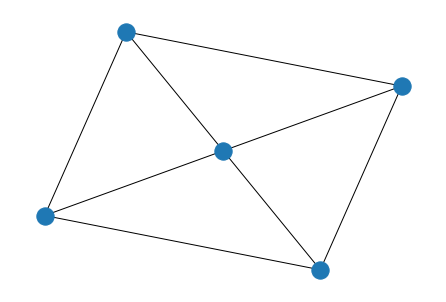

In [77]:
G = create_wheel(5)

pos = {}
seed(2022)

for i, v in enumerate(G.nodes):
    pos[v] = np.array((random(), random()))

force_strength = 0.1

for iteration in tqdm(range(1000)):
    total_force = {v: np.zeros(2) for v in G.nodes}
    for u, v in combinations(G.nodes, 2):
        if (u, v) in G.edges or (v, u) in G.edges:
            distance = np.linalg.norm(pos[u] - pos[v])
            difference = distance - 0.0005
            total_force[u] += force_strength * difference * (1/ distance) * (pos[v] - pos[u])
            total_force[v] += force_strength * difference * (1/ distance) * (pos[u] - pos[v])
            
    for v in G.nodes:
        pos[v] += total_force[v]

nx.draw(G, pos)

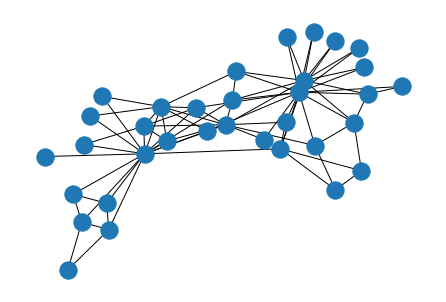

In [4]:
import networkx as nx

G = nx.read_gml('karate.gml', label = None)
nx.draw(G)

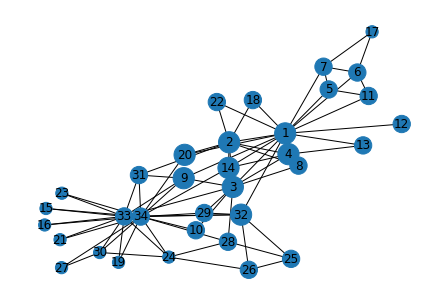

In [19]:
exc = nx.eccentricity(G)
from random import seed
seed(2022)

nx.draw(G, with_labels = True, node_size = [150*(6 - exc[v]) for v in G.nodes])

In [36]:
from itertools import combinations
exc = {v: 0 for v in G.nodes}
closeness_centrality = {v: 0 for v in G.nodes}

for u,v in combinations(G.nodes, 2):
    paths = nx.all_shortest_paths(G, source = u, target = v)
    duv = len(paths.__next__()) - 1
    exc[u] = max(exc[u], duv)
    exc[v] = max(exc[v], duv)
    closeness_centrality[v] += duv
    closeness_centrality[u] += duv
    
for v in G.nodes:
    print(len(G.nodes)/closeness_centrality[v], end = ' ')

0.5862068965517241 0.5 0.576271186440678 0.4788732394366197 0.39080459770114945 0.3953488372093023 0.3953488372093023 0.4533333333333333 0.53125 0.4473684210526316 0.39080459770114945 0.37777777777777777 0.38202247191011235 0.53125 0.38202247191011235 0.38202247191011235 0.29310344827586204 0.38636363636363635 0.38202247191011235 0.5151515151515151 0.38202247191011235 0.38636363636363635 0.38202247191011235 0.40476190476190477 0.38636363636363635 0.38636363636363635 0.37362637362637363 0.4722222222222222 0.4657534246575342 0.3953488372093023 0.4722222222222222 0.5573770491803278 0.53125 0.5666666666666667 

In [37]:
from itertools import combinations

sum_dist = {v: 0 for v in G.nodes}
closeness_centrality = {v: 0 for v in G.nodes}

for u,v in combinations(G.nodes, 2):
    paths = nx.all_shortest_paths(G, source = u, target = v)
    duv = len(paths.__next__()) - 1
    sum_dist[v] += duv
    sum_dist[u] += duv
    
for v in G.nodes:
    closeness_centrality[v] = len(G.nodes)/sum_dist[v]
    print(closeness_centrality[v], end = ' ')

0.5862068965517241 0.5 0.576271186440678 0.4788732394366197 0.39080459770114945 0.3953488372093023 0.3953488372093023 0.4533333333333333 0.53125 0.4473684210526316 0.39080459770114945 0.37777777777777777 0.38202247191011235 0.53125 0.38202247191011235 0.38202247191011235 0.29310344827586204 0.38636363636363635 0.38202247191011235 0.5151515151515151 0.38202247191011235 0.38636363636363635 0.38202247191011235 0.40476190476190477 0.38636363636363635 0.38636363636363635 0.37362637362637363 0.4722222222222222 0.4657534246575342 0.3953488372093023 0.4722222222222222 0.5573770491803278 0.53125 0.5666666666666667 

In [51]:
num_paths = [[0]*(len(G.nodes) + 1)]*(len(G.nodes) + 1)

for u,v in combinations(G.nodes, 2):
    paths = nx.all_shortest_paths(G, source = u, target = v)
    num_paths[u][v] += 1

bet_centrality = {v: 0 for v in G.nodes}

for u,v in combinations(G.nodes, 2):
    paths = nx.all_shortest_paths(G, source = u, target = v)
    path = paths.__next__()
    for i in path:
        if(u != i and v != i):
            bet_centrality[i] += (1 / num_paths[u][v])

for v in G.nodes:
    print(v, bet_centrality[v])

1 16.200414907485836
2 0.49999999999999994
3 7.866793724688488
4 0
5 0
6 1.5205692325105575
7 0.0625
8 0
9 0.8251748251748248
10 0
11 0
12 0
13 0
14 0.13752913752913754
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0.5138332149970081
25 0.03225806451612903
26 0.10840748980348534
27 0
28 0.7941268876051483
29 0
30 0.10817307692307693
31 0
32 1.6576785714285724
33 6.610789214878583
34 2.9230406202955432


In [52]:
from itertools import combinations
betweenness_centrality = {v: 0 for v in G.nodes}

for u, v in combinations(G.nodes, 2):
    paths = nx.all_shortest_paths(G, source=u, target=v)
    sigmas = dict()
    k = 0
    for path in paths:
        k += 1
        for node in path:
            if node not in [u, v]:
                if node not in sigmas:
                    sigmas[node] = 1
                else:
                    sigmas[node] += 1
        for node in sigmas:
            betweenness_centrality[node] += sigmas[node] / k
            
for v in G.nodes:
    print(v, bet_centrality[v])

1 16.200414907485836
2 0.49999999999999994
3 7.866793724688488
4 0
5 0
6 1.5205692325105575
7 0.0625
8 0
9 0.8251748251748248
10 0
11 0
12 0
13 0
14 0.13752913752913754
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0.5138332149970081
25 0.03225806451612903
26 0.10840748980348534
27 0
28 0.7941268876051483
29 0
30 0.10817307692307693
31 0
32 1.6576785714285724
33 6.610789214878583
34 2.9230406202955432


  0%|          | 0/500 [00:00<?, ?it/s]

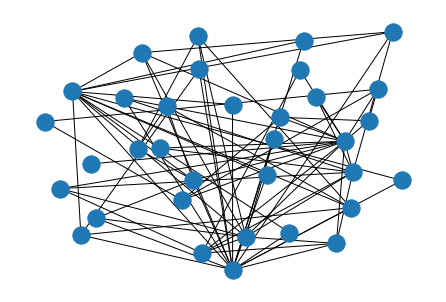

In [2]:
import networkx as nx
from itertools import combinations
import random
# Optionally using tqdm
from tqdm.notebook import tqdm
# change above to “from tqdm import ”tqdm if using console
G = nx.read_gml('karate.gml', label='id')
# Setting seed for reproducibility
random.seed(2021)
# Initializing with random coordinates for the nodes
x = {v: random.random() for v in G.nodes()}
y = {v: random.random() for v in G.nodes()}
# Coefficients determining the balance
# between attraction and repulsion forces
alpha = 0.01
beta = 0.01
max_iterations = 500
# Using tqdm is optional, can write
# just “for iteration in range(max_iterations)”:
for iteration in tqdm(range(max_iterations)):
    x_new = dict(x)
    y_new = dict(y)
# Simulating the repulsion forces
    for u,v in combinations(G.nodes(), 2):
    # The repulsion force is proportional
    # to the inverse square distance between nodes
        inv_d = 1.0 / ((x[u] - x[v])**2 + (y[u] - y[v])**2)
        x_new[u] += beta*(x[u]-x[v])*inv_d
        x_new[v] += beta*(x[v]-x[u])*inv_d
        y_new[u] += beta*(y[u]-y[v])*inv_d
        y_new[v] += beta*(y[v]-y[u])*inv_d
    
    for u, v in combinations(G.nodes(), 2):
        inv_d = ((x[u] - x[v])**2 + (y[u] - y[v])**2)
        if (u, v) in G.edges or (v, u) in G.edges:
            x_new[u] += alpha*(inv_d * (x[u] - x[v]))*(1 / inv_d)
            x_new[v] += alpha*(inv_d * (x[v] - x[u]))*(1 / inv_d)
            y_new[u] += alpha*(inv_d * (y[u] - y[v]))*(1 / inv_d)
            y_new[v] += alpha*(inv_d * (y[v] - y[u]))*(1 / inv_d)

x, y = x_new, y_new
# Drawing the graph with manually computed coordinates
nx.draw(G, pos={v: (x[v], y[v]) for v in G.nodes()})

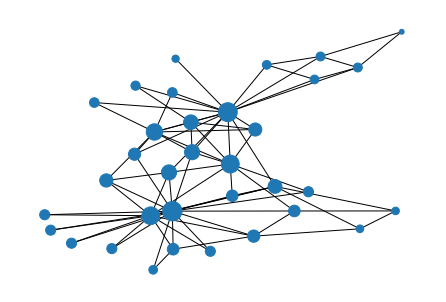

In [3]:
import networkx as nx
G = nx.read_gml('karate.gml', label='id')
max_iterations = 1000
tolerance = 1e-6
eigc = {v: 1/len(G) for v in G.nodes()}
for iteration in range(max_iterations):
    eigc_new = {
        v:
        sum(
            eigc[u]
            for u in G.neighbors(v)
        )
        for v in G.nodes()
    }
    s = sum(eigc_new.values())
    eigc_new = {v: eigc_new[v]/s for v in G.nodes()}
    if sum(abs(eigc[v]-eigc_new[v]) for v in G.nodes()) < tolerance:
        break
    eigc = eigc_new
# 5000 is just the node size visual scaling factor,
# feel free to choose the one that works best for you
nx.draw(
    G,
    nodelist=eigc.keys(),
    node_size=[v*5000 for v in eigc.values()]
)

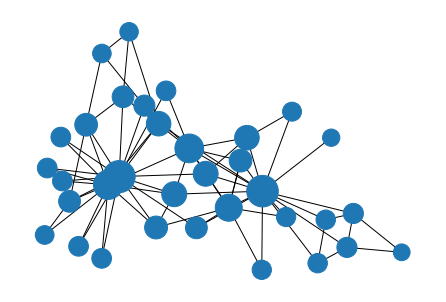

In [27]:
import networkx as nx
G = nx.read_gml('karate.gml', label='id')
max_iterations = 1000
tolerance = 1e-6
alpha = 0.1
beta = 0.1

katz = {v: 1/len(G) for v in G.nodes()}
for iteration in range(max_iterations):
    katz_new = {
        v:
        sum(
            katz[u]
            for u in G.neighbors(v)
        )
        for v in G.nodes()
    }
    alpha = min(alpha, 1/sum(eigc_new.values()))
    katz_new = {v: (alpha*katz_new[v] + beta) for v in G.nodes()}
    if sum(abs(katz[v]-katz_new[v]) for v in G.nodes()) < tolerance:
        break
    katz = katz_new

nx.draw(
    G,
    nodelist=katz.keys(),
    node_size=[v*2000 for v in katz.values()]
)

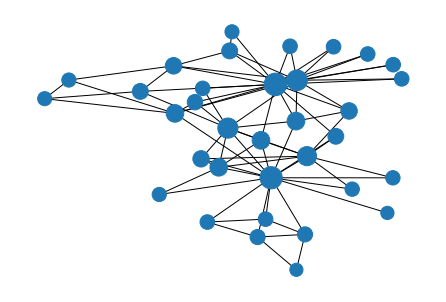

In [28]:
import networkx as nx
G = nx.read_gml('karate.gml', label='id')
max_iterations = 1000
tolerance = 1e-6
d = 0.085
rank = {v: 1/len(G) for v in G.nodes()}
for iteration in range(max_iterations):
    rank_new = {
        v:
        sum(
            rank[u]/len([G.neighbors(u)])
            for u in G.neighbors(v)
        )
        for v in G.nodes()
    }

    rank_new = {v: (1-d)/len(G) + rank_new[v]*d for v in G.nodes()}
    if sum(abs(rank[v] - rank_new[v]) for v in G.nodes()) < tolerance:
        break
    rank = rank_new
# 5000 is just the node size visual scaling factor,
# feel free to choose the one that works best for you
nx.draw(
    G,
    nodelist=rank.keys(),
    node_size=[v*5000 for v in rank.values()]
)

In [1]:
import networkx as nx
from random import random, seed
from itertools import combinations

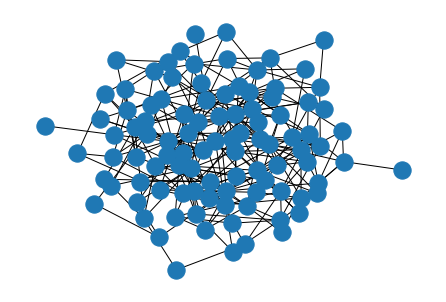

In [2]:
seed(2022)

G = nx.Graph()
n = 100
p = 0.05
G.add_nodes_from(range(n))
for u,v in combinations(G.nodes, 2):
    if random() < p:
        G.add_edge(u, v)

nx.draw_kamada_kawai(G)

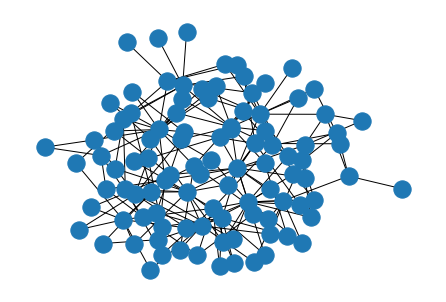

In [55]:
seed(2022)
n = 100
m = 2
m_0 = 20
p = 0.1
G = nx.erdos_renyi_graph(m_0, p, 2022)

sum_degrees = 0
for u in G.degree:
    sum_degrees += u[1]

for u in range(m_0, n):
    G.add_node(u)
    added = 0
    v = 0
    while added < m:
        p_u_v = G.degree[v]/sum_degrees
        if random() < p_u_v:
            added += 1
            G.add_edge(u, v)
            sum_degrees += 2
        v += 1
        v %= u

nx.draw_kamada_kawai(G)    

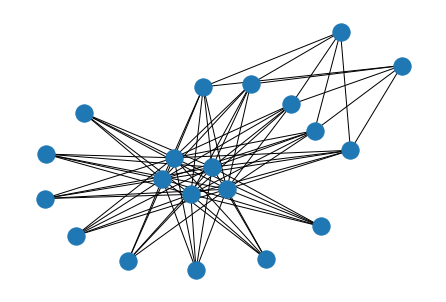

In [92]:
import random
n = 20
m = 5
p = 0.5
G = nx.erdos_renyi_graph(m, p, 2022)

for u in range(m, n):
    G.add_node(u)
    node = random.randint(0, m - 1)
    for v in G.neighbors(node):
        G.add_edge(u, v)

nx.draw(G) 

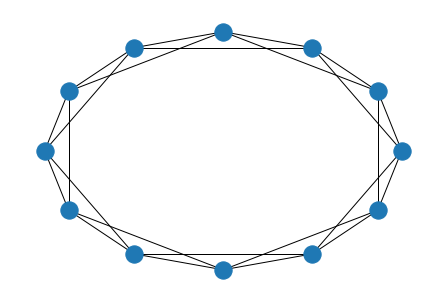

In [124]:
G = nx.watts_strogatz_graph(12, 4, 0.00)

nx.draw_kamada_kawai(G)

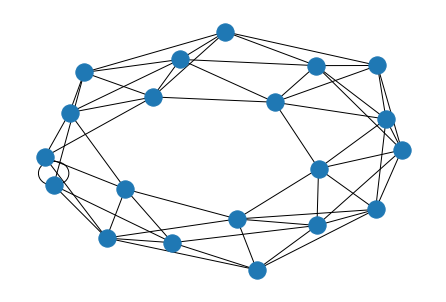

In [155]:
G = nx.Graph()
n = 20
p = 0.1
k = 6
G.add_nodes_from(range(n))
for u in G.nodes:
    for v in range(int(k/2)):
        node = u + v + 1
        node %= n
        G.add_edge(u, node)

rewire = (-1, -1)
for e in G.edges:
    if random.random() < p:
        if rewire == (-1, -1):
            rewire = e
        else:
            G.add_edge(e[0], rewire[1])
            G.add_edge(e[1], rewire[0])
            G.remove_edge(*e)
            G.remove_edge(*rewire)
            rewire = (-1, -1)

nx.draw_kamada_kawai(G)